In [2]:
import numpy as np 
from einops import rearrange

from utils import get_separated_activations
head_wise_activations = np.load(f"/home/baocmt/honest_llama/features/truthful_qa/llama_7B_tqa_mc2_head_wise.npy")
labels = np.load(f"/home/baocmt/honest_llama/features/truthful_qa/llama_7B_tqa_mc2_labels.npy")
head_wise_activations = rearrange(head_wise_activations, 'b l (h d) -> b l h d', h = 32)
separated_head_wise_activations, separated_labels, idxs_to_split_at = get_separated_activations(labels, head_wise_activations)
layer = 11
head = 0


/home/baocmt/anaconda3/envs/iti/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
np.linalg.norm(head_wise_activations[0, layer, head,:])

1.446

In [4]:
usable_head_wise_activations = np.concatenate([separated_head_wise_activations[i][:,layer,head,:] for i in range(len(separated_labels))], axis=0)
usable_labels = np.concatenate([separated_labels[i] for i in range(len(separated_labels))], axis=0)
true_mass_mean = np.mean(usable_head_wise_activations[usable_labels == 1], axis=0)
false_mass_mean = np.mean(usable_head_wise_activations[usable_labels == 0], axis=0)
com_direction = true_mass_mean - false_mass_mean
tuning_activations = np.load(f"/home/baocmt/OT-Intervention/features/truthful_qa/llama_7B_tqa_gen_end_q_head_wise.npy")
tuning_activations = rearrange(tuning_activations, 'b l (h d) -> b l h d', h = 32)
direction = com_direction
direction = direction / np.linalg.norm(direction)
tmp_activations = tuning_activations[:,layer,head,:] 
proj_vals = tmp_activations @ direction.T
proj_val_std = np.std(proj_vals)
iti_direction = 15 * proj_val_std * direction.squeeze()

In [23]:
15 * proj_val_std


2.132526934146881

In [11]:
print(np.linalg.norm(iti_direction))
print(np.linalg.norm(usable_head_wise_activations[0]))
usable_head_wise_activations[0].shape

2.133
1.446


(128,)

[1.446, 1.065, 1.252, 1.223, 1.979, 1.828, 1.933, 1.966, 1.824, 1.8545, 1.884, 1.862, 1.56, 1.711, 1.874, 2.045, 1.949, 1.98, 1.752, 1.788, 1.885, 1.602, 1.648, 2.389, 1.778, 1.521, 1.708, 2.07, 1.953, 2.057, 1.8, 1.771, 1.797, 2.02, 1.725, 1.835, 1.708, 1.871, 2.117, 1.88, 1.8545, 1.645, 1.67, 1.887, 1.942, 1.7, 1.658, 1.753, 1.916, 1.759, 1.765, 1.792, 1.859, 1.921, 2.025, 1.91, 1.906, 1.891, 1.936, 2.023, 2.035, 1.878, 1.785, 1.888, 2.385, 2.193, 2.004, 1.915, 2.213, 2.129, 2.145, 1.804, 2.031, 1.933, 1.853, 1.782, 1.916, 2.018, 1.828, 2.062, 1.359, 1.878, 1.606, 1.897, 2.037, 1.807, 1.776, 1.9, 1.975, 2.035, 1.757, 1.844, 1.352, 1.661, 1.553, 1.951, 1.824, 1.917, 2.2, 1.979, 2.379, 1.897, 1.869, 1.762, 1.509, 1.449, 1.487, 1.673, 1.598, 1.583, 1.704, 2.082, 2.217, 2.164, 1.885, 1.906, 1.802, 1.745, 2.062, 1.85, 1.93, 2.156, 1.835, 1.759, 1.835, 1.967, 2.045, 1.878, 1.743, 1.636, 1.73, 1.858, 1.853, 1.729, 1.874, 1.765, 1.763, 1.765, 1.824, 2.213, 2.215, 2.014, 1.893, 1.906, 1.602, 

(array([9.000e+00, 1.340e+02, 7.170e+02, 1.817e+03, 1.909e+03, 9.650e+02,
        2.630e+02, 5.200e+01, 1.500e+01, 1.000e+00]),
 array([1.06542969, 1.26953125, 1.47460938, 1.67871094, 1.8828125 ,
        2.08789062, 2.29101562, 2.49609375, 2.70117188, 2.90429688,
        3.109375  ]),
 <BarContainer object of 10 artists>)

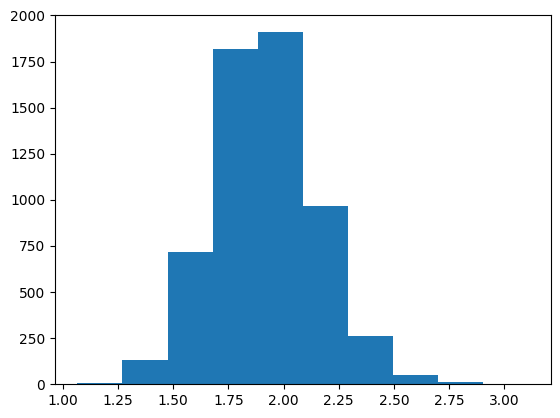

In [15]:
import matplotlib.pyplot as plt
dis = [np.linalg.norm(usable_head_wise_activations[i]) for i in range(len(usable_head_wise_activations))]
print(dis)
plt.hist(dis)

In [10]:
print(np.linalg.norm(direction))

0.9995


In [25]:
A = np.load("/home/baocmt/honest_llama/validation/test4_ot_save/truthful_qa/llama_7B_seed_42_alpha_15.0_fold_0_loss_type_fpr_fnr_bl_2.5/model.layers.11.0.self_attn.o_proj_A.npy")
b = np.load("/home/baocmt/honest_llama/validation/test4_ot_save/truthful_qa/llama_7B_seed_42_alpha_15.0_fold_0_loss_type_fpr_fnr_bl_2.5/model.layers.11.0.self_attn.o_proj_b.npy")

In [26]:
np.linalg.norm(A @ usable_head_wise_activations[0] + b - usable_head_wise_activations[0])

47.59808539787363

/tmp/ipykernel_619357/3933854204.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', n_labels)  # You can choose a different colormap


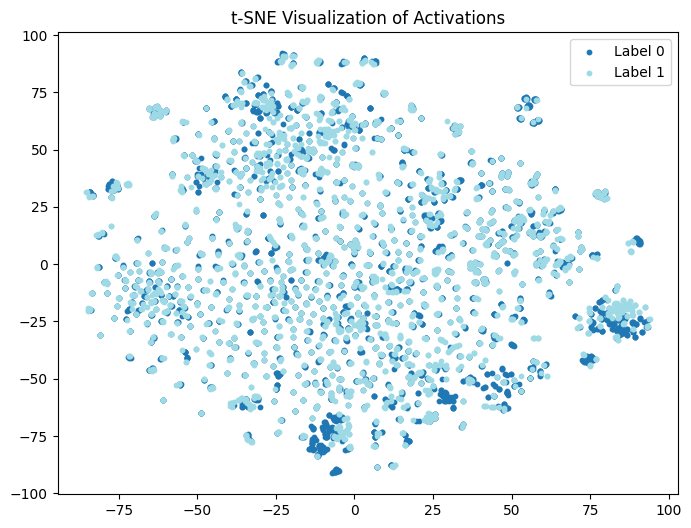

In [5]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming 'acts' is your numpy array of shape (5800, 128) and 'labels' is your label array
# Generate a color map based on unique labels
unique_labels = np.unique(labels)
n_labels = len(unique_labels)
colors = plt.cm.get_cmap('tab20', n_labels)  # You can choose a different colormap

label_color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
acts_2d = tsne.fit_transform(acts)

# Visualize the data with unique colors for each label
plt.figure(figsize=(8, 6))
for label in unique_labels:
    idx = labels == label
    plt.scatter(acts_2d[idx, 0], acts_2d[idx, 1], color=label_color_map[label], label=f'Label {label}', s=10)

plt.title('t-SNE Visualization of Activations')
plt.legend()
plt.show()